# Исследование надежности заемщиков.

**Описание проекта:**

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов. Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Описание данных:**

children — количество детей в семье

days_employed — общий трудовой стаж в днях

dob_years — возраст клиента в годах

education — уровень образования клиента

education_id — идентификатор уровня образования

family_status — семейное положение

family_status_id — идентификатор семейного положения

gender — пол клиента

income_type — тип занятости

debt — имел ли задолженность по возврату кредитов

total_income — ежемесячный доход

purpose — цель получения кредита


**Цель исследования** — ответить на вопросы:

1. Есть ли зависимость между количеством детей и возвратом кредита в срок?
2. Есть ли зависимость между семейным положением и возвратом кредита в срок?
3. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
4. Как разные цели кредита влияют на его возврат в срок?

**Ход исследования:**

1. Обзор данных
2. Предобработка данных
3. Ответы на вопросы
4. Общий вывод

### Шаг 1. Обзор данных

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('data.csv')

Изучим общую информацию о данных, посмотрим первые 10 строк таблицы, построим гистограммы, для того чтобы посмотреть распределение данных в столбцах наглядно. А также посмотрим на все статистические значения методом describe().

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


В датасете есть пропуски, а именно в столбцах days_employed и total_income, причем количество пропущенных значений в столбцах одинаковоe. Столбцы days_employed и total_income сохранены в формате float64, это может быть неудобным для анализа данных.

In [5]:
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Столбец education имеет проблемы с регистром, а в purpose одинаковые цели прописаны разными словами.

In [6]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


<Axes: >

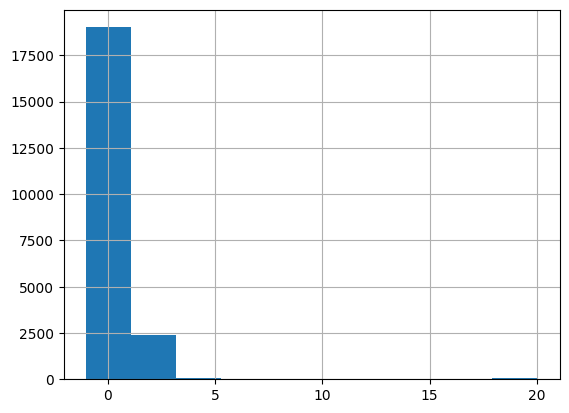

In [7]:
df['children'].hist()

В столбце children есть аномальные значения -1 и 20. Скорее всего это ошибка записи данных.

<Axes: >

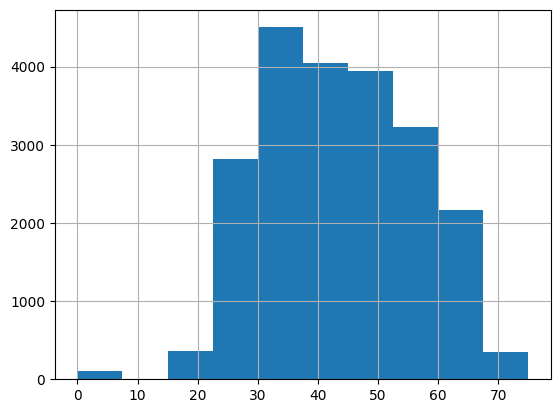

In [8]:
df['dob_years'].hist()

В dob_years есть значения равные 0. Скорее всего это техническая ошибка.

<Axes: >

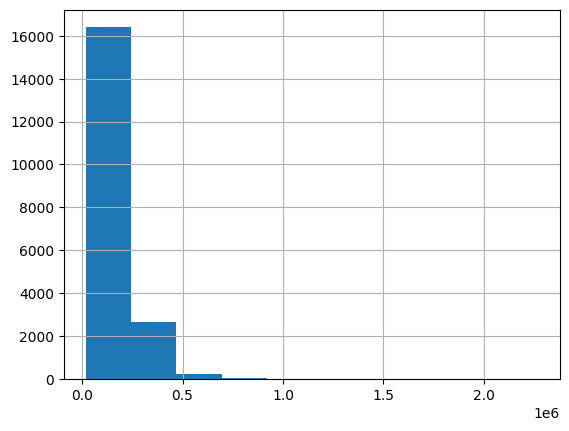

In [9]:
df['total_income'].hist()

<Axes: >

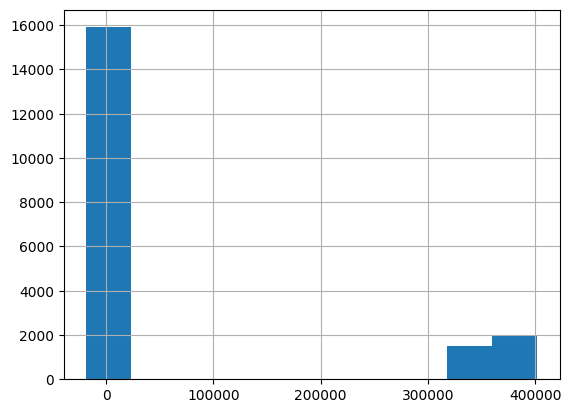

In [10]:
df['days_employed'].hist()

В столбце days_employed есть отрицательные значения.

**Вывод по шагу 1.**
1. Столбцы days_employed и total_income имеют пропущенные значения, причем количество пропущенных значений в столбцах одинаковоe.
2. Столбцы days_employed и total_income сохранены в формате float64, это может быть неудобным для анализа данных.
3. Столбец education имеет проблемы с регистром, а в purpose одинаковые цели прописаны разными словами.
4. В столбце children есть значения -1 и 20. Скорее всего это ошибка записи данных.
5. В столбце dob_years есть значения равные 0.
6. В days_employed есть отрицательные значения.
7. Значения в days_employed скорее всего имеют другую единицу измерения, возможно это техническая ошибка, поскольку 499163.144947 это 1367.5702601287671 лет. Поскольку в задании нет вопроса о взаимосвязи трудового стажа с возвратом кредита в срок, изменять эту ситуацию не будем.

### Шаг 2.1 Заполнение пропусков

Прежде, чем перейти к заполнению пропусков, посмотрим на их общее количество в датафрейме.

In [11]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Посчитаем долю пропущенных значений в days_employed и total_income.

In [12]:
df_nan_days_employed = df[df['days_employed'].isna()]
'Доля пропущенных значений в days_employed составляет: {:.1%}' .format(len(df_nan_days_employed) / len(df))

'Доля пропущенных значений в days_employed составляет: 10.1%'

In [13]:
df_nan_total_income = df[df['total_income'].isna()]
'Доля пропущенных значений в total_income составляет: {:.1%}' .format(len(df_nan_total_income) / len(df))

'Доля пропущенных значений в total_income составляет: 10.1%'

Перейдем к заполнению пропусков в total_income, к days_employed вернемся позже, поскольку там есть отрицательные значения.

Заполним пропущенные значения в total_income медианой.
Для заполнения выбираем медиану, поскольку эта мера измерения наиболее объективна, чем среднее значение. Для наглядности посмотрим сначала среднее значение и медиану.

In [14]:
df['total_income'].median()

145017.93753253992

In [15]:
df['total_income'].mean()

167422.30220817294

Посмотрим на медианные значения total_income в зависимости от типа занятости.

In [16]:
total_income_median = df.groupby('income_type')['total_income'].median()
total_income_median

income_type
безработный        131339.751676
в декрете           53829.130729
госслужащий        150447.935283
компаньон          172357.950966
пенсионер          118514.486412
предприниматель    499163.144947
сотрудник          142594.396847
студент             98201.625314
Name: total_income, dtype: float64

Напишем функцию, которая будет возвращать медианное значение заработной платы в соответствии типом занятости.

In [17]:
def fillna_total_income_median_ (df, row):
    income_type_unique = df['income_type'].unique()
    for type in income_type_unique:
        df.loc[df['income_type'] == type, row] = df.loc[df['income_type'] == type, row].fillna(df[df['income_type'] == type]['total_income'].median())
    return df

df = fillna_total_income_median_(df, 'total_income')

In [18]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
dtype: int64

Пропуски в total_income заполнены.

### Шаг 2.2 Проверка данных на аномалии и исправления.

Аномальные (в нашем случае - отрицательные) значения есть, в days_employed. Исправим это.

In [19]:
df['days_employed'] = df['days_employed'].apply(abs)

<Axes: >

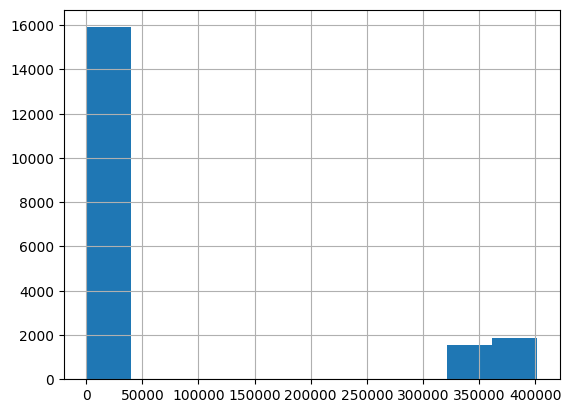

In [20]:
df['days_employed'].hist()

Создадим сводную таблицу pivot_table_days_employed

In [21]:
pivot_table_days_employed = df.pivot_table(index=['dob_years'],
                                columns = 'gender',
                                values = 'days_employed',
                                aggfunc='median')

Напишем функцию, которая будет возвращать медианное значение трудового стажа в соответствии с полом и возрастом, если обнаружит NaN. В противном случае вернет значение обратно.

In [22]:
def fillna_days_employed(df):
    gender = df['gender']
    age = df['dob_years']
    if pd.isna(df['days_employed']):
        return pivot_table_days_employed.loc[age,gender]
    else:
        return df['days_employed']

In [23]:
df['days_employed'] = df.apply(fillna_days_employed, axis = 1)

<Axes: >

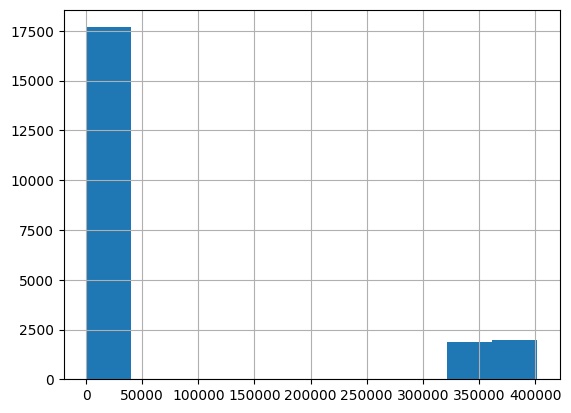

In [24]:
df['days_employed'].hist()

In [25]:
df.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

Пропуски в days_employed заполнены.

Теперь исправим аномальные значения в children.

In [26]:
df['children'] = df['children'].replace(20, 2)
df['children'] = df['children'].replace(-1, 1)

<Axes: >

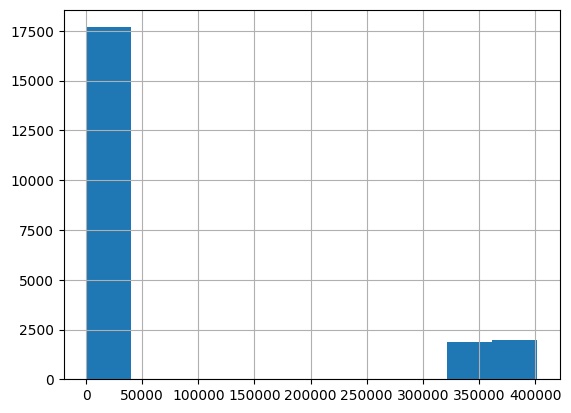

In [27]:
df['days_employed'].hist()

In [28]:
df['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

В столбце gender есть значение XNA

In [29]:
df[df['gender'] == 'XNA'].count()

children            1
days_employed       1
dob_years           1
education           1
education_id        1
family_status       1
family_status_id    1
gender              1
income_type         1
debt                1
total_income        1
purpose             1
dtype: int64

In [30]:
df[df['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,2358.600502,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости


Всего одная строка, она не повлияет на анализ данных.

### Шаг 2.3. Изменение типов данных.

In [31]:
df['total_income'] = df['total_income'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  int64  
 11  purpose           21525 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 2.0+ MB


### Шаг 2.4. Удаление дубликатов.

Проанализируем столбцы, в которых хранятся строковые значения.

In [32]:
df['education'].unique()

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

Приведем значения education к единому регистру.

In [33]:
df['education'] = df['education'].str.lower()
df['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

In [34]:
df["family_status"].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

 Приведем значения family_status к единому регистру.

In [35]:
df['family_status'] = df['family_status'].str.lower()
df['family_status'].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'не женат / не замужем'], dtype=object)

In [36]:
df['income_type'].unique()

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

С income_type все в порядке.

В dob_years есть значения равные 0, заполним их медианой в соответствии с типом занятости.

In [37]:
income_type_groubpy = df.groupby('income_type')['dob_years'].median()
income_type_groubpy

income_type
безработный        38.0
в декрете          39.0
госслужащий        40.0
компаньон          39.0
пенсионер          60.0
предприниматель    42.5
сотрудник          39.0
студент            22.0
Name: dob_years, dtype: float64

In [38]:
df.loc[(df['income_type'] == 'безработный ') & (df['dob_years'] == 0), 'dob_years'] = 38
df.loc[(df['income_type'] == 'в декрете') & (df['dob_years'] == 0), 'dob_years'] = 39
df.loc[(df['income_type'] == 'госслужащий') & (df['dob_years'] == 0), 'dob_years'] = 40
df.loc[(df['income_type'] == 'компаньон') & (df['dob_years'] == 0), 'dob_years'] = 39
df.loc[(df['income_type'] == 'пенсионер') & (df['dob_years'] == 0), 'dob_years'] = 60
df.loc[(df['income_type'] == 'предприниматель') & (df['dob_years'] == 0), 'dob_years'] = 42.5
df.loc[(df['income_type'] == 'сотрудник') & (df['dob_years'] == 0), 'dob_years'] = 39
df.loc[(df['income_type'] == 'студент') & (df['dob_years'] == 0), 'dob_years'] = 22

Теперь найдем общее количество дубликатов.

In [39]:
df.duplicated().sum()

71

Избавимся от них и восстановим индексы.

In [40]:
df  = df.drop_duplicates().reset_index(drop = True)

In [41]:
df.duplicated().sum()

0

Дубликатов больше нет.

Выведем информацию о данных функцией describe после предобработки данных.

In [42]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,2.145400e+04
mean,0.480563,66529.276562,43.474690,0.817097,0.973898,0.081150,1.653196e+05
std,0.756069,138344.970356,12.226883,0.548674,1.421567,0.273072,9.818730e+04
min,0.000000,24.141633,19.000000,0.000000,0.000000,0.000000,2.066700e+04
25%,0.000000,995.382743,33.000000,1.000000,0.000000,0.000000,1.076230e+05
50%,0.000000,2165.619459,42.000000,1.000000,0.000000,0.000000,1.425940e+05
75%,1.000000,5369.619266,53.000000,1.000000,1.000000,0.000000,1.958202e+05
max,5.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

Сформирует дополнительные датафреймы.

In [43]:
df_1 = pd.DataFrame(data=df, columns=['education','education_id'])
df_1

,education,education_id
0,высшее,0
1,среднее,1
2,среднее,1
3,среднее,1
4,среднее,1
...,...,...
21449,среднее,1
21450,среднее,1
21451,среднее,1
21452,среднее,1


In [44]:
df_2 = pd.DataFrame(data=df, columns=['family_status','family_status_id'])
df_2

,family_status,family_status_id
0,женат / замужем,0
1,женат / замужем,0
2,женат / замужем,0
3,женат / замужем,0
4,гражданский брак,1
...,...,...
21449,гражданский брак,1
21450,женат / замужем,0
21451,гражданский брак,1
21452,женат / замужем,0


Удалим education и family_status.

In [45]:
df = df.drop(columns='education')
df = df.drop(columns='family_status')

df

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42.0,0,0,F,сотрудник,0,253875,покупка жилья
1,1,4024.803754,36.0,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623.422610,33.0,1,0,M,сотрудник,0,145885,покупка жилья
3,3,4124.747207,32.0,1,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266.072047,53.0,1,1,F,пенсионер,0,158616,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...
21449,1,4529.316663,43.0,1,1,F,компаньон,0,224791,операции с жильем
21450,0,343937.404131,67.0,1,0,F,пенсионер,0,155999,сделка с автомобилем
21451,1,2113.346888,38.0,1,1,M,сотрудник,1,89672,недвижимость
21452,3,3112.481705,38.0,1,0,M,сотрудник,1,244093,на покупку своего автомобиля


### Шаг 2.6. Категоризация дохода.

На основании диапазонов, создим столбец total_income_category с категориями:

In [46]:
def total_income_category(row):
    income = row['total_income']
    if income >= 30000:
        return 'E'
    elif income >= 30001 and income <= 50000:
        return 'D'
    elif income >= 200001 and income <= 1000000:
        return 'B'
    else:
        return 'A'

df ['total_income_category'] =  df.apply(total_income_category, axis=1)
df['total_income_category'].unique()


array(['E', 'A'], dtype=object)

### Шаг 2.7. Категоризация целей кредита.

Создадим функцию, которая на основании данных из столбца purpose сформирует новый столбец purpose_category, в который войдут следующие категории:'операции с автомобилем','операции с недвижимостью','проведение свадьбы','получение образования'.

In [47]:
def purpose_category(list):
    if 'автомобил' in list:
        return 'операции с автомобилем'
    if "жиль" in list:
        return "операции с недвижимостью"
    if 'недвиж' in list:
        return "операции с недвижимостью"
    if "свадьб" in list:
        return 'проведение свадьбы'
    if "образ" in list:
        return "получение образования"

df['purpose_category'] = df['purpose'].apply(purpose_category)
df['purpose_category'].unique()

array(['операции с недвижимостью', 'операции с автомобилем',
       'получение образования', 'проведение свадьбы'], dtype=object)

Теперь категории всего 4.

### Ответы на вопросы.

##### Вопрос 1: Есть ли зависимость между количеством детей и возвратом кредита в срок?

Посмотрим как количество детей влияет на возврат кредита. Для этого создадим датафрейм и добавим в него необходимые столбцы, для расчета конверсии возвратов кредита.

In [48]:
df_children = pd.DataFrame()
df_children['count_children'] = df.groupby('children')['debt'].count()
df_children['children_sum'] = df.groupby('children')['debt'].sum()
df_children['convers_children'] = df_children['children_sum'] / df_children['count_children']
df_children.sort_values('convers_children', ascending = False)

,count_children,children_sum,convers_children
children,,,
4,41,4,0.097561
2,2128,202,0.094925
1,4855,445,0.091658
3,330,27,0.081818
0,14091,1063,0.075438
5,9,0,0.000000


##### Вывод 1: Получается, что многодетные семьи чаще имеют задолженность по кредиту. Чем больше детей, тем больше просроченных задолженностей. При этом с 3 детьми чаще платят в срок, чем с 1 ребенком. Бездетные, как правило реже просрачивают оплату по кредиту, чем люди с детьми.

##### Вопрос 2: Есть ли зависимость между семейным положением и возвратом кредита в срок?

Посмотрим как семейное положение влияет на возврат кредита. Для этого создадим датафрейм и добавим в него необходимые столбцы, для расчета конверсии возвратов кредита.

In [49]:
frame_family_status = pd.DataFrame()
frame_family_status['family_status_sum'] = df.groupby('family_status_id')['debt'].sum()
frame_family_status['family_status_count'] = df.groupby('family_status_id')['debt'].count()
frame_family_status['convers_family_status'] = frame_family_status['family_status_sum'] / frame_family_status['family_status_count']
frame_family_status.sort_values('convers_family_status', ascending = False)

,family_status_sum,family_status_count,convers_family_status
family_status_id,,,
4,274,2810,0.097509
1,388,4151,0.093471
0,931,12339,0.075452
3,85,1195,0.071130
2,63,959,0.065693


##### Вывод 2: Не состоящие в браке наиболее склонны к задержке выплат, в то же время вдовцы/вдовы меньше всех склонны к задолженностям по кредиту.

##### Вопрос 3: Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Ранее мы категоризировали данные по доходам. Посмотрим как уровень доходов влияет на возврат кредита. Для этого создадим датафрейм и добавим в него необходимые столбцы, для расчета конверсии возвратов кредита.

In [50]:
debt_total_income = pd.DataFrame()
debt_total_income['total_income_sum'] = df.groupby('total_income_category')['debt'].sum()
debt_total_income['total_income_count'] = df.groupby('total_income_category')['debt'].count()
debt_total_income['convers_total_income'] = debt_total_income['total_income_sum'] / debt_total_income['total_income_count']
debt_total_income.sort_values('convers_total_income', ascending = False)

,total_income_sum,total_income_count,convers_total_income
total_income_category,,,
A,2,22,0.090909
E,1739,21432,0.081140


У тех кто получает среднюю зарплату вероятность просроченных кредитов ниже, чем у людей с высоким доходом.

##### Вопрос 4: Как разные цели кредита влияют на его возврат в срок?

Сгруппируем данные и сделаем выводы.

In [51]:
debt_purpose = pd.DataFrame()
debt_purpose['total_purpose_sum'] = df.groupby('purpose_category')['debt'].sum()
debt_purpose['total_purpose_count'] = df.groupby('purpose_category')['debt'].count()
debt_purpose['convers_purpose'] = debt_purpose['total_purpose_sum'] / debt_purpose['total_purpose_count']
debt_purpose.sort_values('convers_purpose', ascending = False)

,total_purpose_sum,total_purpose_count,convers_purpose
purpose_category,,,
операции с автомобилем,403,4306,0.093590
получение образования,370,4013,0.092200
проведение свадьбы,186,2324,0.080034
операции с недвижимостью,782,10811,0.072334


Наибольшая вероятность стать должником у людей, которые получают кредит на операции с автомобилем. Наименьшая вероятность, когда получают кредит на операции с недвижимостью

## Общий вывод:

Самый безопасный заемщик **вдовец/вдова, без детей, со средней зарплатой, получающий кредит с целью операции с недвижимостью.**